In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Baffin = pd.read_excel(filepath, sheet_name='Baffin-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Baffin)
fp.date_time(Baffin)

,Extent,Date
0,1090625.815,1979-01-01
1,1157634.866,1979-02-01
2,1299583.477,1979-03-01
3,1137194.680,1979-04-01
4,983083.453,1979-05-01
...,...,...
533,781460.891,2023-06-01
534,331845.048,2023-07-01
535,99334.625,2023-08-01
536,49359.723,2023-09-01


In [5]:
scaler = MinMaxScaler()
Baffin['Extent'] = scaler.fit_transform(Baffin['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 11
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Baffin['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((516, 12, 1), (516,))

In [8]:
X_train, y_train = X[:419], y[:419]
X_val, y_val = X[419:471], y[419:471]
X_test, y_test = X[471:], y[471:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Baffin_model_LT11/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
47/53 [=========================>....] - ETA: 0s - loss: 0.2592 - root_mean_squared_error: 0.5091

INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


53/53 [==============================] - 6s 74ms/step - loss: 0.2578 - root_mean_squared_error: 0.5078 - val_loss: 0.1802 - val_root_mean_squared_error: 0.4245
Epoch 2/50
45/53 [========================>.....] - ETA: 0s - loss: 0.1849 - root_mean_squared_error: 0.4300

INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


53/53 [==============================] - 3s 52ms/step - loss: 0.1821 - root_mean_squared_error: 0.4267 - val_loss: 0.1521 - val_root_mean_squared_error: 0.3900
Epoch 3/50
49/53 [==========================>...] - ETA: 0s - loss: 0.1311 - root_mean_squared_error: 0.3620

INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


53/53 [==============================] - 3s 56ms/step - loss: 0.1308 - root_mean_squared_error: 0.3616 - val_loss: 0.1270 - val_root_mean_squared_error: 0.3563
Epoch 4/50
45/53 [========================>.....] - ETA: 0s - loss: 0.1032 - root_mean_squared_error: 0.3213

INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.0997 - root_mean_squared_error: 0.3158 - val_loss: 0.1062 - val_root_mean_squared_error: 0.3259
Epoch 5/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0789 - root_mean_squared_error: 0.2808

INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


53/53 [==============================] - 3s 56ms/step - loss: 0.0769 - root_mean_squared_error: 0.2774 - val_loss: 0.0881 - val_root_mean_squared_error: 0.2968
Epoch 6/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0627 - root_mean_squared_error: 0.2503

INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


53/53 [==============================] - 3s 56ms/step - loss: 0.0588 - root_mean_squared_error: 0.2425 - val_loss: 0.0721 - val_root_mean_squared_error: 0.2685
Epoch 7/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0498 - root_mean_squared_error: 0.2231

INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


53/53 [==============================] - 3s 60ms/step - loss: 0.0471 - root_mean_squared_error: 0.2171 - val_loss: 0.0596 - val_root_mean_squared_error: 0.2441
Epoch 8/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0381 - root_mean_squared_error: 0.1951

INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


53/53 [==============================] - 3s 57ms/step - loss: 0.0360 - root_mean_squared_error: 0.1896 - val_loss: 0.0498 - val_root_mean_squared_error: 0.2231
Epoch 9/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0267 - root_mean_squared_error: 0.1633

INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


53/53 [==============================] - 3s 59ms/step - loss: 0.0282 - root_mean_squared_error: 0.1679 - val_loss: 0.0354 - val_root_mean_squared_error: 0.1882
Epoch 10/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0218 - root_mean_squared_error: 0.1476

INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


53/53 [==============================] - 3s 53ms/step - loss: 0.0225 - root_mean_squared_error: 0.1500 - val_loss: 0.0267 - val_root_mean_squared_error: 0.1635
Epoch 11/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0178 - root_mean_squared_error: 0.1336

INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


53/53 [==============================] - 3s 56ms/step - loss: 0.0201 - root_mean_squared_error: 0.1418 - val_loss: 0.0190 - val_root_mean_squared_error: 0.1379
Epoch 12/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0168 - root_mean_squared_error: 0.1298

INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.0172 - root_mean_squared_error: 0.1312 - val_loss: 0.0110 - val_root_mean_squared_error: 0.1049
Epoch 13/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0167 - root_mean_squared_error: 0.1293

INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


53/53 [==============================] - 3s 54ms/step - loss: 0.0170 - root_mean_squared_error: 0.1304 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0869
Epoch 14/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0146 - root_mean_squared_error: 0.1208

INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


53/53 [==============================] - 3s 56ms/step - loss: 0.0140 - root_mean_squared_error: 0.1182 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0728
Epoch 15/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0139 - root_mean_squared_error: 0.1181

INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.0144 - root_mean_squared_error: 0.1202 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0653
Epoch 16/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0129 - root_mean_squared_error: 0.1135

INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


53/53 [==============================] - 3s 55ms/step - loss: 0.0134 - root_mean_squared_error: 0.1158 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0571
Epoch 17/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0145 - root_mean_squared_error: 0.1204

INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


53/53 [==============================] - 3s 54ms/step - loss: 0.0143 - root_mean_squared_error: 0.1194 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0563
Epoch 18/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0139 - root_mean_squared_error: 0.1179 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0601
Epoch 19/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0120 - root_mean_squared_error: 0.1094 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0570
Epoch 20/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0164 - root_mean_squared_error: 0.1280

INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


53/53 [==============================] - 3s 59ms/step - loss: 0.0170 - root_mean_squared_error: 0.1304 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0543
Epoch 21/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0144 - root_mean_squared_error: 0.1199 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0767
Epoch 22/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0138 - root_mean_squared_error: 0.1174 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0657
Epoch 23/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0160 - root_mean_squared_error: 0.1266 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0628
Epoch 24/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0151 - root_mean_squared_error: 0.1230 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0561
Epoch 25/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0122 - root_mean_squared_error: 0.1105 - val_loss: 0.0030 - val_root_mean_squared

INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


INFO:tensorflow:Assets written to: Baffin_model_LT11\assets


53/53 [==============================] - 3s 55ms/step - loss: 0.0124 - root_mean_squared_error: 0.1113 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0532
Epoch 43/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0111 - root_mean_squared_error: 0.1052 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0562
Epoch 44/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0132 - root_mean_squared_error: 0.1150 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0857
Epoch 45/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0150 - root_mean_squared_error: 0.1224 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0645
Epoch 46/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0126 - root_mean_squared_error: 0.1124 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0582
Epoch 47/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0134 - root_mean_squared_error: 0.1157 - val_loss: 0.0050 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.148731239636739 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

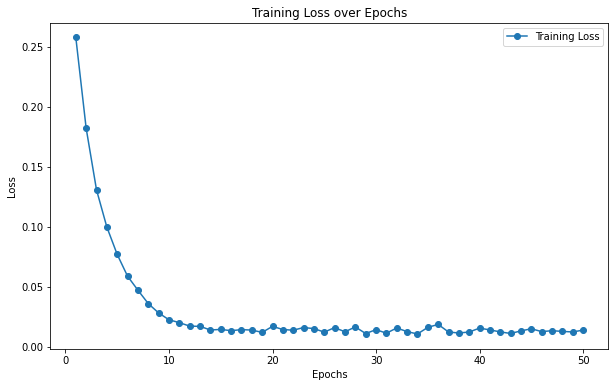

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

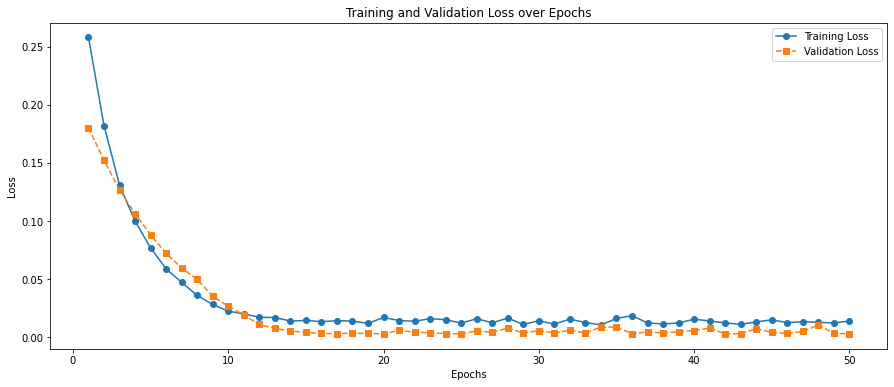

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

Test Predictions

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Baffin_model_LT11/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 14ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

RMSE : 0.05930953004215997


In [19]:
mae = mean_absolute_error(y_test, test_predictions)
print(mae)

0.04347372327785508


In [20]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

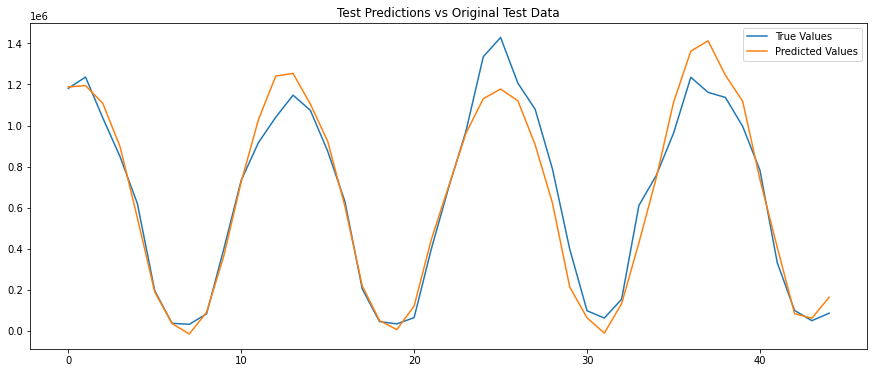

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

Prediction on whole dataset

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
mse = mean_squared_error(y, predictions)
print(mse)

0.004401251935670211


In [24]:
mae = mean_absolute_error(y, predictions)
print(mae)

0.049143009384403635


In [25]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

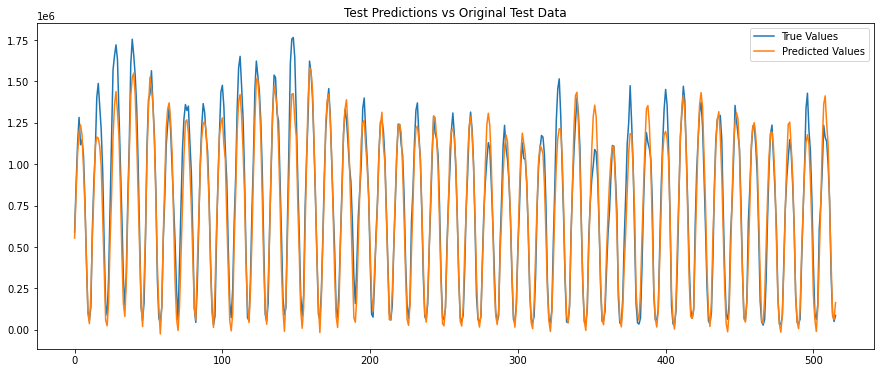

In [26]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()